# <font color="AA0088">Exam Scores</font>

## <font color="AA0088">Project Participants</font>

Stakeholder(s): Me

Project Manager(s): Me

Data Analyst(s): erm.... Me

## <font color="AA0088">Problem Definition</font>

The purpose of this project is to gather insights from a collection of exam scores to understand the following main goals:

* The average score for each gender
* The average score for each group

## <font color="AA0088">Import Required Libraries</font>

The below libraries are required by this notebook.

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px

Show the versions of the libraries that will be used.

In [5]:
print(f"Matplotlib Version:   {mpl.__version__}")
print(f"Numpy Version:        {np.__version__}")
print(f"Pandas Version:       {pd.__version__}")
print(f"Seaborn Version:      {sn.__version__}")

Matplotlib Version:   3.5.3
Numpy Version:        1.23.3
Pandas Version:       1.4.4
Seaborn Version:      0.12.0


## <font color="AA0088">Data Processing</font>

### Data Source(s)

The data for this project was acquired from the following location(s):

### Data Overview

Give an overview of what the data represents as a whole.

### Data Dictionary

No data dictionary has been provided by the supplier of the data. 

From initial investigation of the features, a data dictionary has been created and can be found [here](data/raw-data-dictionary.xlsx).

**<font color="AA0088">NOTE</font>**: The contents of the description for each feature are assumptions but are logical assumptions based on the description of each feature.

### Import The Raw Data

First step is to import the data to a pandas dataframe from the source of the data. In this case, the source data will be a csv file.

In [6]:
raw_data_df = pd.read_csv("./data/raw_data.csv")

### Details About The Raw Data Dataframe

Let us have a quick look at the first five rows of the dataframe.

In [7]:
raw_data_df.head(n = 5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Now let's have a look at the information about the raw_data_df.

In [8]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Initial observations are that there are:

* 8 features which are mostly:
  * string (object)
  * integers (int64)
* 1000 rows
* No null values but that will be checked soon

Some of the features have spaces or / in their names so they should be changed to _ to make querying them simpler.

### Cleaning Up The Data

Before performing any data cleaning, the names of each feature with a space or a / need to be changed to an _.

First, make a copy of the raw_data_df so that it stays in tact in case it is needed later on.

In [9]:
exam_scores_df = raw_data_df.copy()
exam_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Now let's change the names of the features to remove the spaces and /'s. 

Once done, the columns will then have any uppercase values converted to lowercase.

In [10]:
exam_scores_df.columns = exam_scores_df.columns.str.replace(" ", "_")
exam_scores_df.columns = exam_scores_df.columns.str.replace("/", "_")

# --- Convert any uppercase characters to lowercase:
exam_scores_df.columns = exam_scores_df.columns.str.lower()

In [11]:
exam_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Now that the column names are in a more preferred format, let's have a look to see if there are any null values.

In [12]:
exam_scores_df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Ok, there are no null values in any of the features.

### Export The Working Set Dataframe

Before going any further, let's make a backup of the current progress of the dataframe to a csv file.

In [13]:
exam_scores_df.to_csv(path_or_buf = "./data/exam_scores.csv", 
                      index = False)

Now let's move onto the exploratory data analysis phase.

## <font color="AA0088">Exploratory Data Analysis</font>

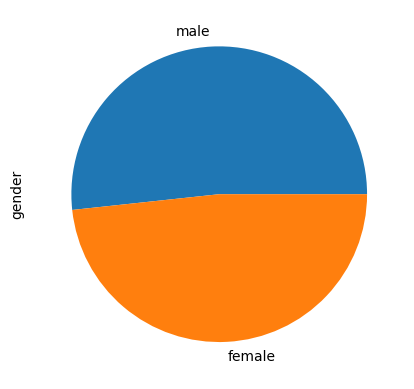

In [14]:
exam_scores_df["gender"].value_counts().plot.pie();

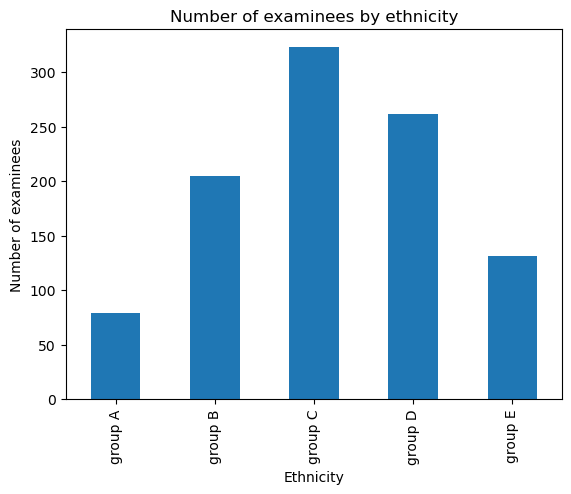

In [15]:
exam_scores_df["race_ethnicity"].value_counts().sort_index(ascending=True).plot.bar(title = "Number of examinees by ethnicity",
                                                                                    xlabel = "Ethnicity",
                                                                                    ylabel = "Number of examinees");

### Average Scores By Gender

### Average Scores By Group